<div style="width: 100%; clear: both;">
<img src="https://www.publicdomainpictures.net/pictures/100000/velka/tree-1409159715eln.jpg", align="left", width="175", height="175">   
<div style="float: left; width: 100%; font-family: Luminari, fantasy;">
<p style="margin: ; padding-top: 10px; text-align:left;  font-size: 19px; ">Porfolio of Ruben Deulofeu Gomez</p>
    <p style="margin: 0; text-align:left; font-size: 16px;">Data science & Machine Learning </p>
    <p style="margin: 0; text-align:left; padding-bottom: 10px; font-size: 16px;">2021</p>
</div>
</div>

# Unsupervised Clustering Analysis

---

In [2]:
import random

import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster                   
from sklearn import datasets                 
from sklearn import manifold                
from sklearn import decomposition             
from sklearn.utils import check_random_state  

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Clustering algorithms

In this section, we will analyze some clustering algorithms and when it's appropiate to use each one of them.

### Data generation via *sklearn.dataset* library

In [11]:
X_blobs, y_blobs = datasets.make_blobs(n_samples=1000, n_features=2, centers=4, cluster_std=1.6, random_state=42)
X_moons, y_moons = datasets.make_moons(n_samples=1000, noise=.07, random_state=42)
X_circles, y_circles = datasets.make_circles(n_samples=1000, factor=.5, noise=.05, random_state=42)

Each dataset contains 2 variables: *X* (2 dimension variable) and *y* (label variable).

The *y* variable will be only used as a target for analyze the performance of clustering models.


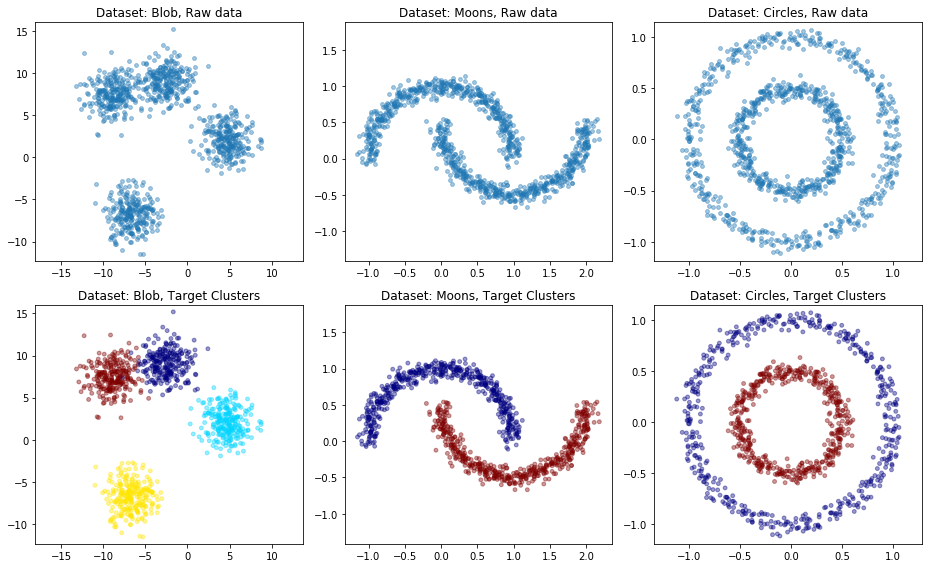

In [18]:
# Plotting Datasets

fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         [None] * 3 + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):
    ax.set_title('Dataset: {}, '.format(name) + ('Raw data' if i < 3 else 'Target Clusters'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.4, cmap='jet')
    ax.axis('equal')
plt.tight_layout()

### 1.1. K-means

Searching the best number of clusters via Elbow Method.  

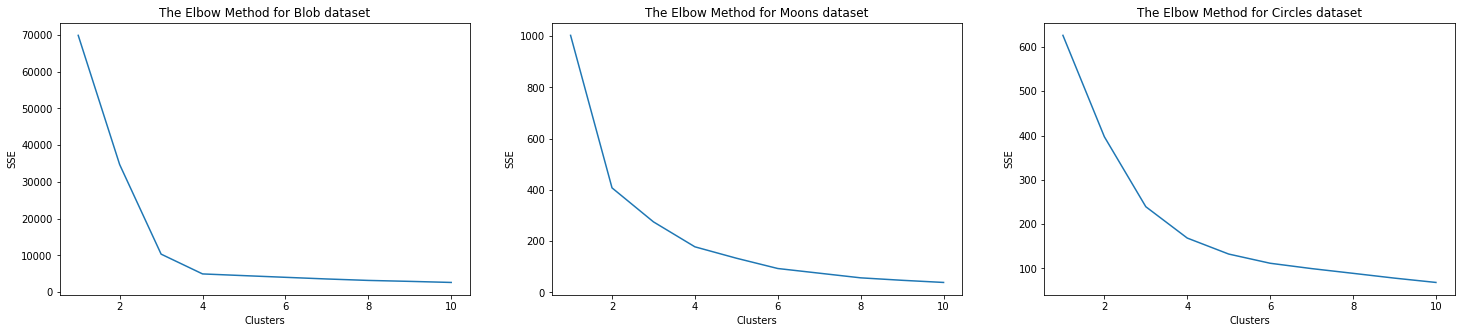

In [32]:
fig, axis = plt.subplots(1, 3, figsize=(25, 5))
for X, y, axs, name in zip([X_blobs, X_moons, X_circles],
                     [y_blobs, y_moons, y_circles], 
                     axis.reshape(-1), 
                     ['Blob', 'Moons', 'Circles']):
    sse = []
    for i in range(1, 11):
        kmeans = cluster.KMeans(n_clusters = i)
        kmeans.fit(X)
        sse.append(kmeans.inertia_)

    axs.plot(range(1, 11), sse)
    axs.set_title('The Elbow Method for {} dataset'.format(name) )
    axs.set_xlabel('Clusters')
    axs.set_ylabel('SSE')


Due to previous graphics, we can deduce that an appropiate number of clusters for each dataset (Blob, Moons, Circles) is 4, 2 and 4 respectively. 

Let's see how it works.

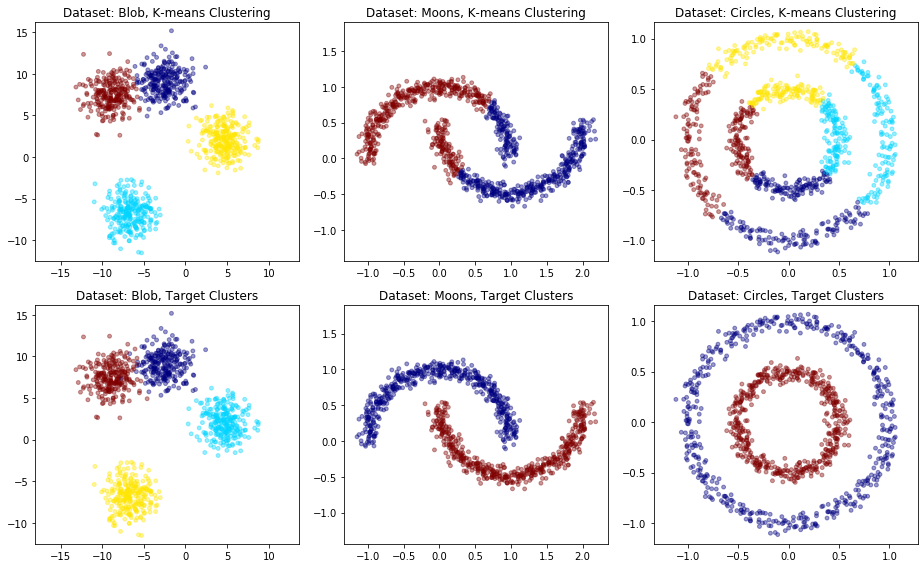

In [51]:
y_kmeans = []
for X , k in zip([X_blobs, X_moons, X_circles], [4,2,4]):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(X)
    y_kmeans.append(kmeans.predict(X))
    

fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         y_kmeans + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):

    ax.set_title('Dataset: {}, '.format(name) + ('K-means Clustering' if i < 3 else 'Target Clusters'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.4, cmap='jet')
    ax.axis('equal')
plt.tight_layout()




As we can see, the K-means algorithm only performs well on Blob Dataset. This is because this algorithm uses the Euclidean distance to determine the clusters, which is not appropiate in Moons and Circles datasets.

## 1.2 DBSCAN (Density-based spatial Clustering)

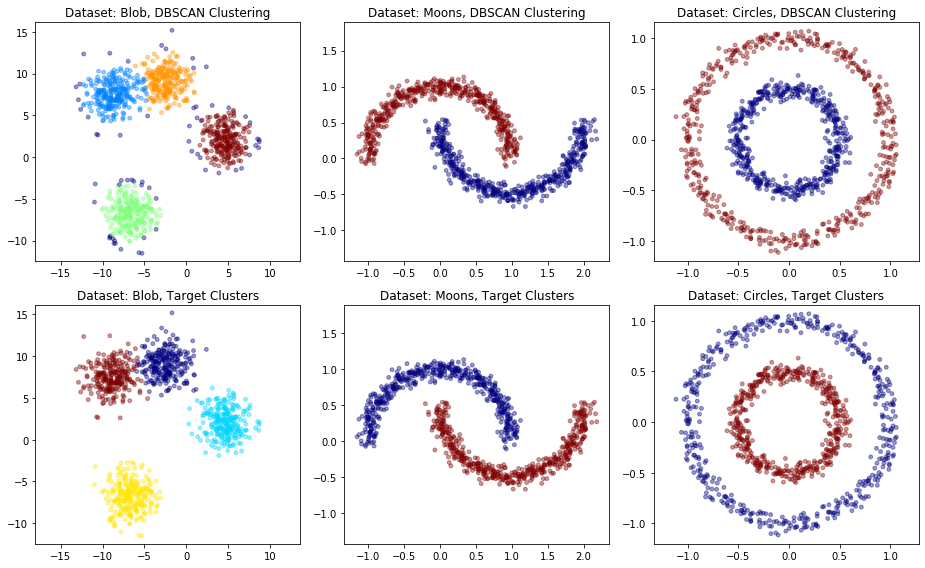

In [59]:
y_dbscan = []
for X , eps, min_samples in zip([X_blobs, X_moons, X_circles], [3,0.2,0.1], [200,5,1]):
    dbscan = cluster.DBSCAN(eps = eps, min_samples = min_samples)
    dbscan.fit(X)
    y_dbscan.append(dbscan.labels_)

fig, axis = plt.subplots(2, 3, figsize=(13, 8))
for i, (X, y, ax, name) in enumerate(zip([X_blobs, X_moons, X_circles] * 2,
                                         y_dbscan + [y_blobs, y_moons, y_circles],
                                         axis.reshape(-1),
                                         ['Blob', 'Moons', 'Circles'] * 2)):

    ax.set_title('Dataset: {}, '.format(name) + ('DBSCAN Clustering' if i < 3 else 'Target Clusters'))
    ax.scatter(X[:,0], X[:,1], s=15, c=y, alpha=.4, cmap='jet')
    ax.axis('equal')
plt.tight_layout()


Above graphics show that the DBSCAN algorithm performs perfectly on Moons and Circles datasets, and quite well on Blob dataset. Seems like density-based clustering works much better than K-means in 2 out of 3 datasets.

### 1.3 Hierarchical clustering

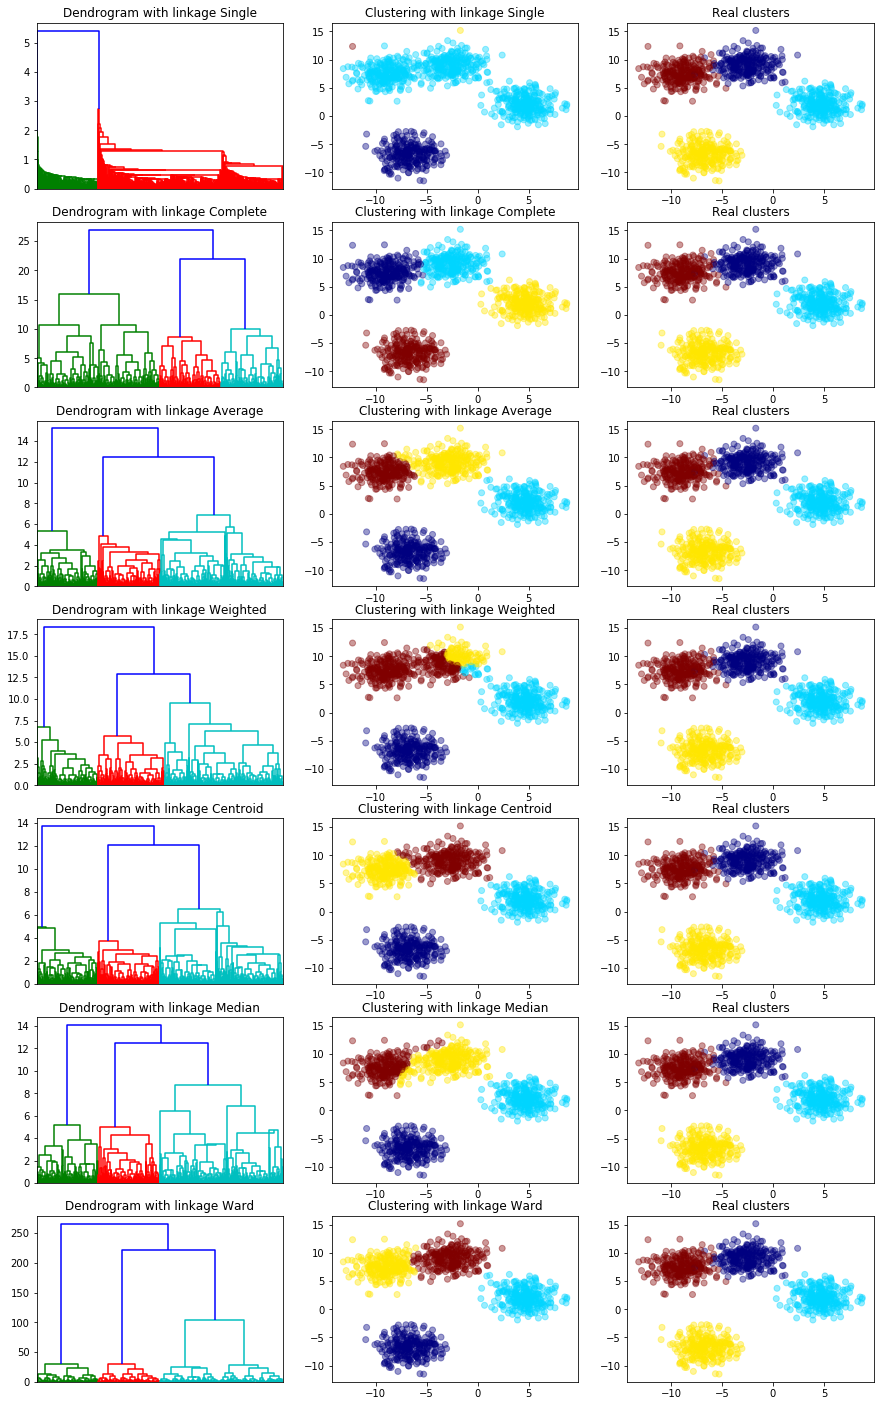

In [63]:
methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]

X, y = X_blobs, y_blobs
Z = [linkage(pdist(X), method) for method in methods]

fig, axs = plt.subplots(7,3, figsize=(15,25))
for i in range(1,8):
    axs[i-1][0].set_title("Dendrogram with linkage " + methods[i-1].capitalize()) 
    dendrogram(Z[i-1], ax=axs[i-1][0], no_labels = True)
    
    predictions = fcluster(Z[i-1], 4, criterion = "maxclust")
    axs[i-1][1].scatter(X[:,0], X[:,1], c = predictions, alpha=.4, cmap = "jet")
    axs[i-1][1].set_title("Clustering with linkage " + methods[i-1].capitalize()) 
    axs[i-1][2].scatter(X[:,0], X[:,1], c = y, alpha=.4, cmap = "jet")
    axs[i-1][2].set_title("Real clusters")
plt.show()

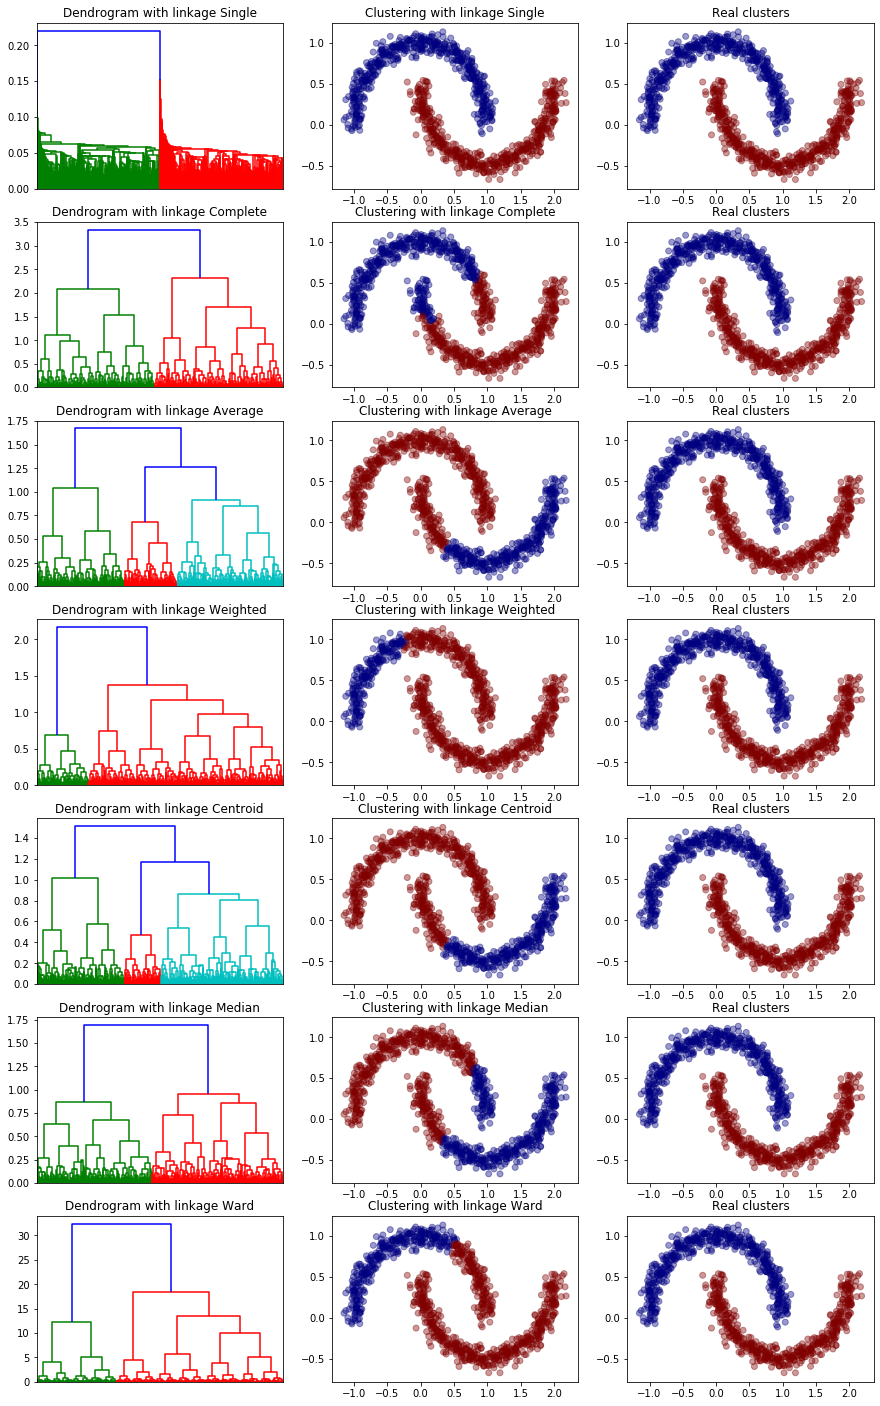

In [66]:
X, y = X_moons, y_moons
Z = [linkage(pdist(X), method) for method in methods]

fig, axs = plt.subplots(7,3, figsize=(15,25))
for i in range(1,8):
    axs[i-1][0].set_title("Dendrogram with linkage " + methods[i-1].capitalize()) 
    dendrogram(Z[i-1], ax=axs[i-1][0], no_labels = True)
    
    predictions = fcluster(Z[i-1], 2, criterion = "maxclust")
    axs[i-1][1].scatter(X[:,0], X[:,1], c = predictions, alpha=.4, cmap = "jet")
    axs[i-1][1].set_title("Clustering with linkage " + methods[i-1].capitalize()) 
    axs[i-1][2].scatter(X[:,0], X[:,1], c = y, alpha=.4, cmap = "jet")
    axs[i-1][2].set_title("Real clusters")
plt.show()

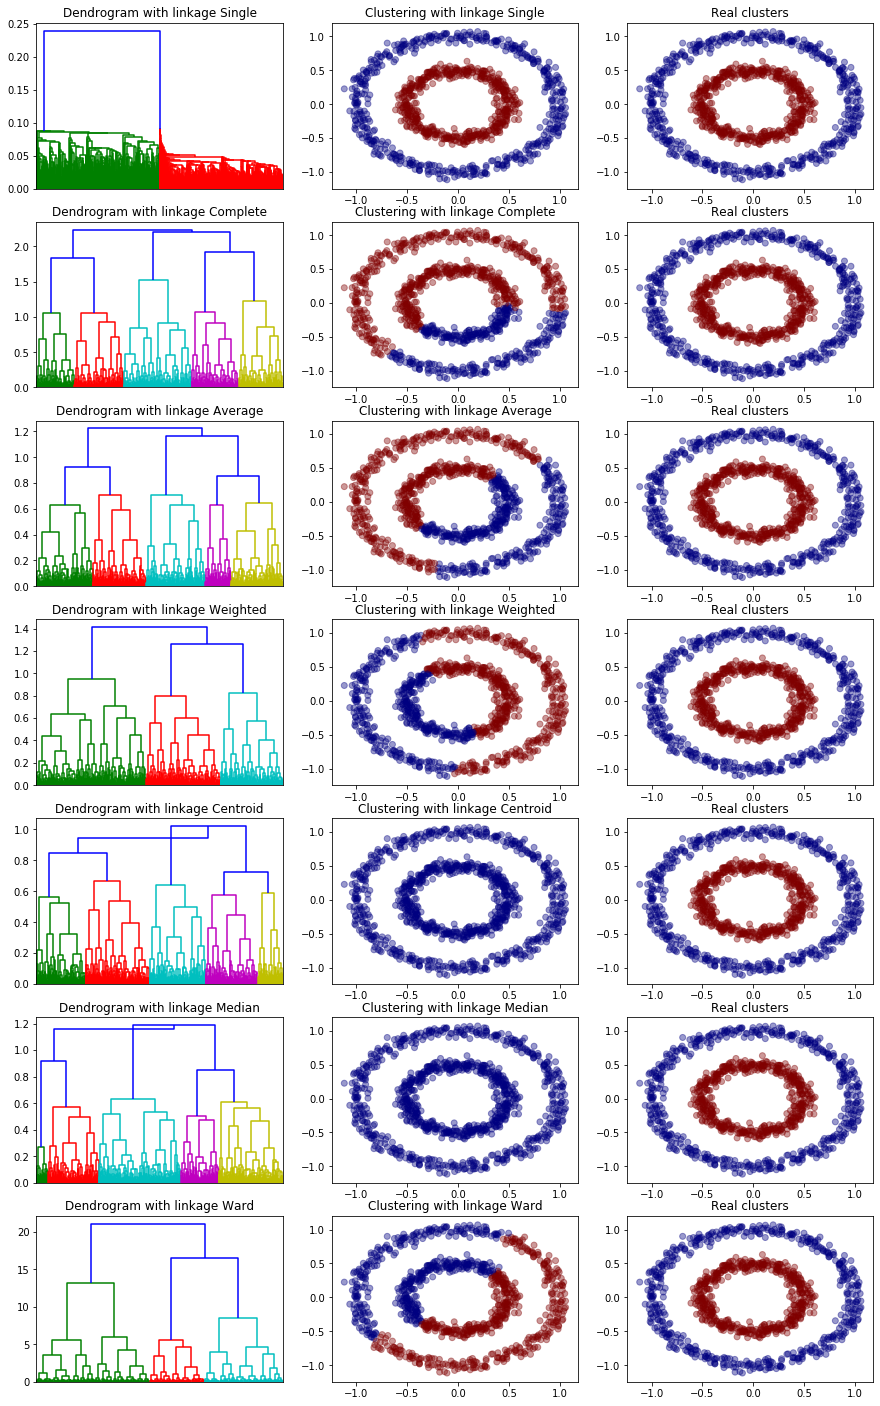

In [72]:
X, y = X_circles, y_circles

methods = ["single", "complete", "average", "weighted", "centroid", "median", "ward"]
Z = [linkage(pdist(X), method) for method in methods]

fig, axs = plt.subplots(7,3, figsize=(15,25))
for i in range(1,8):
    axs[i-1][0].set_title("Dendrogram with linkage " + methods[i-1].capitalize()) 
    dendrogram(Z[i-1], ax=axs[i-1][0], no_labels = True)
    
    predictions = fcluster(Z[i-1], 2, criterion = "maxclust")
    axs[i-1][1].scatter(X[:,0], X[:,1], c = predictions, alpha=.4, cmap = "jet")
    axs[i-1][1].set_title("Clustering with linkage " + methods[i-1].capitalize()) 
    axs[i-1][2].scatter(X[:,0], X[:,1], c = y, alpha=.4, cmap = "jet")
    axs[i-1][2].set_title("Real clusters")
plt.show()

Selecting properly the parameters of the Hierarchical model, we see a great perfomance in every dataset that we are considering.  

## 2. Quick Aplication: Image Segmentation using K-means

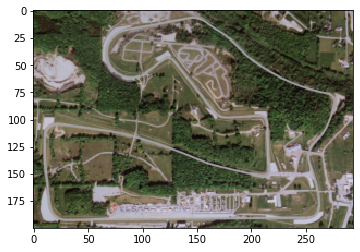

In [75]:
from skimage import io, transform

photo = transform.resize(
    io.imread('https://lh3.googleusercontent.com/-kHq0XyQh3b8/TYFk1h0r2-I/AAAAAAAAAJA/i3rdSELDqxM/s1600/road_america_base.jpg'),
    (200, 294), mode='edge')
plt.imshow(photo)
X = photo.reshape(-1, 3)

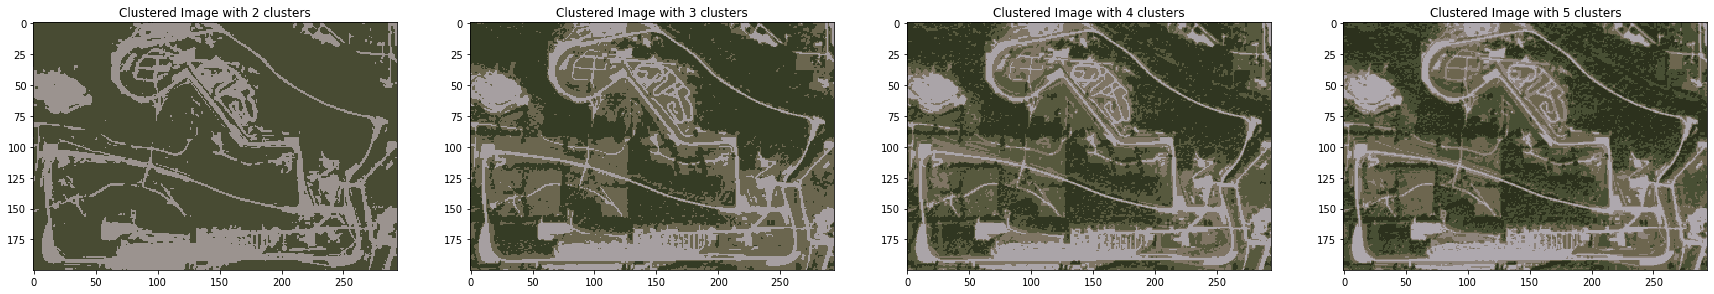

In [85]:

fig, axs = plt.subplots(1,4, figsize=(30,30))
for k, ax in zip(range(2,6),axs):
    kmeans = cluster.KMeans(n_clusters = k)
    kmeans.fit(X)
    clusters = kmeans.cluster_centers_[kmeans.labels_]
    clusters = clusters.reshape(photo.shape[0], photo.shape[1], photo.shape[2])
    ax.imshow(clusters)
    ax.set_title('Clustered Image with {} clusters'.format(k))

plt.show()